# Exploratory Notebook

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid")

In [52]:
# loading the dataset
df = pd.read_csv('../zippedData/bom.movie_gross.csv.gz', encoding='latin1',low_memory=False)
df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [53]:
df.shape 

(3387, 5)

In [54]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [55]:
# converting year from int64 to datetime format
df['year'] = pd.to_datetime(df['year'],format='%Y')

# extracting the year_only for further analysis (created a new column called year_only)
df['year_only'] = df['year'].dt.year

# converting the foreign_gross to a float(similar to the domestic_gross)
# the foreign_gross has a comma which we will have to replace so as to convert it to float.
df['foreign_gross'] = pd.to_numeric(df['foreign_gross'].str.replace(',', '', regex=False), errors='coerce')

In [56]:
# checking whether the columns are now in the right format.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           3387 non-null   object        
 1   studio          3382 non-null   object        
 2   domestic_gross  3359 non-null   float64       
 3   foreign_gross   2037 non-null   float64       
 4   year            3387 non-null   datetime64[ns]
 5   year_only       3387 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 158.9+ KB


In [57]:
# checking for the null values, from the highest to the lowest %
(df.isna().mean()*100).sort_values(ascending = False)

foreign_gross     39.858282
domestic_gross     0.826690
studio             0.147623
year_only          0.000000
year               0.000000
title              0.000000
dtype: float64

In [58]:
# summary of the columns
df.describe()

,domestic_gross,foreign_gross,year_only
count,3.359000e+03,2.037000e+03,3387.000000
mean,2.874585e+07,7.487281e+07,2013.958075
std,6.698250e+07,1.374106e+08,2.478141
min,1.000000e+02,6.000000e+02,2010.000000
25%,1.200000e+05,3.700000e+06,2012.000000
50%,1.400000e+06,1.870000e+07,2014.000000
75%,2.790000e+07,7.490000e+07,2016.000000
max,9.367000e+08,9.605000e+08,2018.000000


In [59]:
# Summary for objects-column
df.describe(include='object')

,title,studio
count,3387,3382
unique,3386,257
top,Bluebeard,IFC
freq,2,166


In [60]:
# checking for unique variables in the columnns for analysis
colm = df.columns

for colm in df:
    colm_val = df[colm].unique()
    print(f"{colm},'\n',{colm_val}","\n")

title,'
',['Toy Story 3' 'Alice in Wonderland (2010)'
 'Harry Potter and the Deathly Hallows Part 1' ... 'El Pacto' 'The Swan'
 'An Actor Prepares'] 

studio,'
',['BV' 'WB' 'P/DW' 'Sum.' 'Par.' 'Uni.' 'Fox' 'Wein.' 'Sony' 'FoxS' 'SGem'
 'WB (NL)' 'LGF' 'MBox' 'CL' 'W/Dim.' 'CBS' 'Focus' 'MGM' 'Over.' 'Mira.'
 'IFC' 'CJ' 'NM' 'SPC' 'ParV' 'Gold.' 'JS' 'RAtt.' 'Magn.' 'Free' '3D'
 'UTV' 'Rela.' 'Zeit.' 'Anch.' 'PDA' 'Lorb.' 'App.' 'Drft.' 'Osci.' 'IW'
 'Rog.' nan 'Eros' 'Relbig.' 'Viv.' 'Hann.' 'Strand' 'NGE' 'Scre.' 'Kino'
 'Abr.' 'CZ' 'ATO' 'First' 'GK' 'FInd.' 'NFC' 'TFC' 'Pala.' 'Imag.' 'NAV'
 'Arth.' 'CLS' 'Mont.' 'Olive' 'CGld' 'FOAK' 'IVP' 'Yash' 'ICir' 'FM'
 'Vita.' 'WOW' 'Truly' 'Indic.' 'FD' 'Vari.' 'TriS' 'ORF' 'IM' 'Elev.'
 'Cohen' 'NeoC' 'Jan.' 'MNE' 'Trib.' 'Rocket' 'OMNI/FSR' 'KKM' 'Argo.'
 'SMod' 'Libre' 'FRun' 'WHE' 'P4' 'KC' 'SD' 'AM' 'MPFT' 'Icar.' 'AGF'
 'A23' 'Da.' 'NYer' 'Rialto' 'DF' 'KL' 'ALP' 'LG/S' 'WGUSA' 'MPI' 'RTWC'
 'FIP' 'RF' 'ArcEnt' 'PalUni' 'EpicPics' 'E

In [61]:
# Show only object columns with missing values
missing_obj_col = df.select_dtypes(include='object').isna().sum()
print(missing_obj_col,'\n')

# Get the mode of the studio column
mode_value = df['studio'].mode()[0]
print(mode_value)

# Fill nulls with the mode
df['studio'] = df['studio'].fillna(mode_value)


title     0
studio    5
dtype: int64 

IFC


In [68]:
# Show only numeric columns with missing values
missing_num_col = df.select_dtypes('number').isna().sum()
print(missing_num_col,'\n')

# checking the skewness of the gross amounts to determine how best to deal with the missing data
print("Skewness of domestic_gross:", df['domestic_gross'].skew())
print("Skewness of foreign_gross:", df['foreign_gross'].skew())

# both are highly right-skewed. 
# Since the skew is >1, using the mean would be misleading because large outliers inflate it.
# and using the median would only be okay if the msissing values was actually an error,not an absence of data
# to avoid distorting the values by extreme outliers
# but in this case, we will make a compromise to assume that the movies did not have a foreign or domestic revenue
# therefore filling with 0 (zero) instead of the median

# Fill missing values using the median
df['domestic_gross'] = df['domestic_gross'].fillna(0)
df['foreign_gross'] = df['foreign_gross'].fillna(0)

# creating a new column total_gross 
df['total_gross'] = df['domestic_gross'] + df['foreign_gross']

domestic_gross    0
foreign_gross     0
year_only         0
total_gross       0
dtype: int64 

Skewness of domestic_gross: 4.739461665968898
Skewness of foreign_gross: 4.187564432211363


In [63]:
# to confirm that we do not have any missing values, numbers and objects:
missing_num_col = df.select_dtypes('number').isna().sum()
print(missing_num_col,'\n')

missing_obj_col = df.select_dtypes(include='object').isna().sum()
print(missing_obj_col,'\n')

domestic_gross    0
foreign_gross     0
year_only         0
dtype: int64 

title     0
studio    0
dtype: int64 



In [73]:
# checking the columns we will be working on:

df.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year',
       'year_only', 'total_gross'],
      dtype='object')

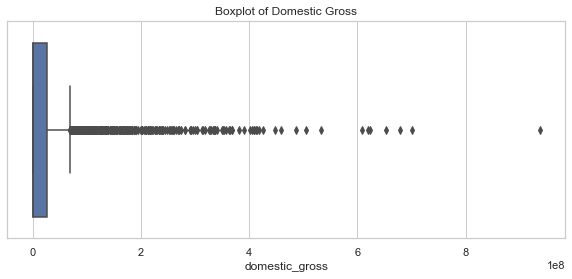

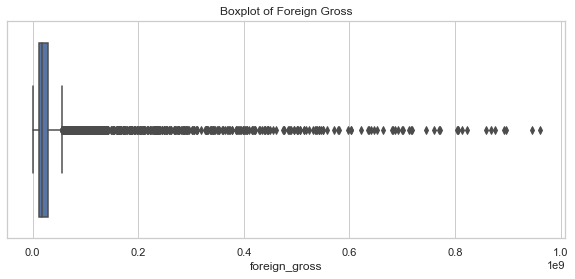

In [70]:
# boxplot to check for skewness and outliers
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['domestic_gross'])
plt.title('Boxplot of Domestic Gross')
plt.show()

plt.figure(figsize=(10, 4))
sns.boxplot(x=df['foreign_gross'])
plt.title('Boxplot of Foreign Gross')
plt.show()
# box the domestic and foreign gross are heavily right-skewed.

In [ ]:
# the top studio per year based on total_gross (picking the first row withing each group)
top_studios = df.sort_values('total_gross', ascending=False).groupby('year_only').first().reset_index()
top_studios

,year_only,title,studio,domestic_gross,foreign_gross,year,total_gross
0,2010,Toy Story 3,BV,415000000.0,652000000.0,2010-01-01,1.067000e+09
1,2011,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011-01-01,1.341500e+09
2,2012,Marvel's The Avengers,BV,623400000.0,895500000.0,2012-01-01,1.518900e+09
3,2013,Frozen,BV,400700000.0,875700000.0,2013-01-01,1.276400e+09
4,2014,Transformers: Age of Extinction,Par.,245400000.0,858600000.0,2014-01-01,1.104000e+09
5,2015,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015-01-01,1.405400e+09
6,2016,Captain America: Civil War,BV,408100000.0,745200000.0,2016-01-01,1.153300e+09
7,2017,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017-01-01,1.332600e+09
8,2018,Black Panther,BV,700100000.0,646900000.0,2018-01-01,1.347000e+09


In [ ]:
#saving the DataFrame to CSV
df.to_csv('../Cleaned_Data/cleaned_bom.movie_gross.csv', index=False)